In [24]:
import numpy as np
from matplotlib import pyplot as plt 
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [25]:
Data1 = genfromtxt('MCI_Data.csv', delimiter=',')

In [26]:
Labels = genfromtxt('MCI_Labels.csv', delimiter=',')

In [27]:
Data1.shape

(210, 131)

In [28]:
std1=np.std(Data1, axis=0)
index1=(std1!=0)
Data2=Data1[:,index1]
print(Data2.shape)

(210, 126)


In [29]:
min1=np.min(Data2, axis=0)
max1=np.max(Data2, axis=0)
print(min1.shape, max1.shape)
Data3=(Data2-min1)/(max1-min1)
print(Data3.shape)

(126,) (126,)
(210, 126)


In [30]:
X=Data3
y=Labels

In [32]:
def FDR(X, y):
  #y=np.reshape(y, (y.shape[0],1))
  index0=(y==0)
  index1=(y==1)
  X1=X[index0,:]
  X2=X[index1, :]
  #print(X1.shape, X2.shape)
  m1=np.mean(X1, axis=0)
  m2=np.mean(X2, axis=0)
  s1=np.std(X1, axis=0)
  s2=np.std(X2, axis=0)
  fdr=((m1-m2)**2)/(s1**2 + s2**2)
  #print(fdr.shape)
  fdr1=-1*fdr
  index3=np.argsort(fdr1)
  return index3  

In [33]:
fdr_order=FDR(X,y)
X=X[:, fdr_order]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140, 126) (70, 126) (140,) (70,)


In [36]:
clf = SVC(gamma='auto')
acc=[]
for i in range(1, X.shape[1]):
  X1=X[:,:i]
  X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33)
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  a=np.sum(y_pred==y_test)/y_test.shape
  acc.append(a)

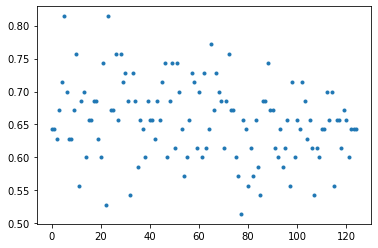

In [37]:
plt.plot(acc, '.')

In [38]:
acc

[array([0.64285714]),
 array([0.64285714]),
 array([0.62857143]),
 array([0.67142857]),
 array([0.71428571]),
 array([0.81428571]),
 array([0.7]),
 array([0.62857143]),
 array([0.62857143]),
 array([0.67142857]),
 array([0.75714286]),
 array([0.55714286]),
 array([0.68571429]),
 array([0.7]),
 array([0.6]),
 array([0.65714286]),
 array([0.65714286]),
 array([0.68571429]),
 array([0.68571429]),
 array([0.62857143]),
 array([0.6]),
 array([0.74285714]),
 array([0.52857143]),
 array([0.81428571]),
 array([0.67142857]),
 array([0.67142857]),
 array([0.75714286]),
 array([0.65714286]),
 array([0.75714286]),
 array([0.71428571]),
 array([0.72857143]),
 array([0.68571429]),
 array([0.54285714]),
 array([0.72857143]),
 array([0.68571429]),
 array([0.58571429]),
 array([0.65714286]),
 array([0.64285714]),
 array([0.6]),
 array([0.68571429]),
 array([0.65714286]),
 array([0.65714286]),
 array([0.62857143]),
 array([0.68571429]),
 array([0.65714286]),
 array([0.71428571]),
 array([0.74285714]),
 

In [39]:
max_acc=np.max(acc)
final_index=np.argmax(acc)
print(max_acc, final_index)

0.8142857142857143 5


In [40]:
clf = SVC(kernel="linear")
acc=[]
for i in range(1, X.shape[1]):
  X1=X[:,:i]
  X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33)
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  a=np.sum(y_pred==y_test)/y_test.shape
  acc.append(a)

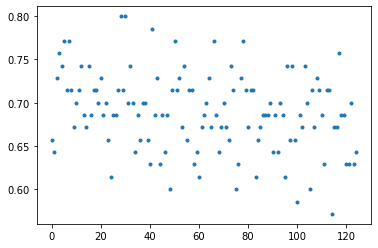

In [41]:
plt.plot(acc, '.')

In [42]:
max_acc=np.max(acc)
final_index=np.argmax(acc)
print(max_acc, final_index)

0.8 28


In [43]:
c = np.linspace(0.1, 100, 100)
final_acc=[]
for cost in c:
  clf = SVC(kernel="linear", C=cost)
  acc=[]
  for i in range(1, X.shape[1]):
    X1=X[:,:i]
    X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    a=np.sum(y_pred==y_test)/y_test.shape
    acc.append(a)
  max_acc=np.max(acc)
  final_index=np.argmax(acc)
  print(max_acc, final_index)
  final_acc.append(max_acc)
  

0.8428571428571429 30
0.7857142857142857 5
0.8142857142857143 29
0.8571428571428571 5
0.8142857142857143 9
0.7714285714285715 3
0.8285714285714286 5
0.8142857142857143 1
0.8 21
0.8 1
0.8 99
0.8142857142857143 32
0.8142857142857143 84
0.7857142857142857 4
0.8 1
0.8 7
0.8 85
0.8 48
0.8142857142857143 18
0.8285714285714286 37
0.8 89
0.8 9
0.8142857142857143 52
0.7857142857142857 22
0.8285714285714286 98
0.8428571428571429 46
0.8 27
0.8 13
0.8142857142857143 7
0.7857142857142857 5
0.8 5
0.7857142857142857 11
0.8142857142857143 6
0.8285714285714286 1
0.8428571428571429 7
0.7857142857142857 93
0.8 51
0.8 36
0.7857142857142857 9
0.8142857142857143 69
0.8285714285714286 41
0.8142857142857143 17
0.7857142857142857 11
0.8285714285714286 40
0.8285714285714286 40
0.8 14
0.8285714285714286 42
0.8 30
0.7857142857142857 7
0.7857142857142857 27
0.8428571428571429 32
0.7857142857142857 9
0.7714285714285715 4
0.8142857142857143 30
0.8142857142857143 17
0.7714285714285715 9
0.8 30
0.8571428571428571 32
0

In [44]:
np.max(final_acc)

0.9

In [45]:
y_pred=clf.predict(X_test)


In [46]:
np.sum(y_pred==y_test)/y_test.shape

array([0.6])